## **1. Boston 주택 가격 예측 모델**

### **데이터 로드 및 전처리**
* 먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
* 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
# 필요한 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
import tensorflow.keras.backend as K
from keras import regularizers
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


* 데이터셋의 전처리를 위해 표준화 작업을 수행해야 합니다.

In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

### **모델 구성 및 컴파일**
* 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

# 모델 구성
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

# 모델 컴파일
model.compile(loss='mse',
              optimizer='Adam',
              metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


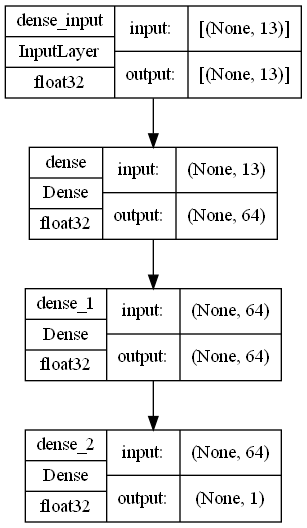

In [5]:
# 그림으로 확인
utils.plot_model(model, show_shapes=True, show_dtype=True)

### **모델 학습**
* epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                   epochs=250,
                   batch_size=25,
                   validation_split=0.3)

Epoch 1/250
12/12 [==============================] - 1s 15ms/step - loss: 519.2900 - mae: 20.9689 - val_loss: 577.1403 - val_mae: 21.5900
Epoch 2/250
12/12 [==============================] - 0s 4ms/step - loss: 466.0237 - mae: 19.5373 - val_loss: 514.8533 - val_mae: 19.9790
Epoch 3/250
12/12 [==============================] - 0s 3ms/step - loss: 402.3831 - mae: 17.7332 - val_loss: 438.2971 - val_mae: 18.0322
Epoch 4/250
12/12 [==============================] - 0s 3ms/step - loss: 325.5551 - mae: 15.5103 - val_loss: 343.1760 - val_mae: 15.6857
Epoch 5/250
12/12 [==============================] - 0s 3ms/step - loss: 232.9092 - mae: 12.7181 - val_loss: 241.5856 - val_mae: 12.7615
Epoch 6/250
12/12 [==============================] - 0s 3ms/step - loss: 144.3839 - mae: 9.6695 - val_loss: 154.5023 - val_mae: 9.5176
Epoch 7/250
12/12 [==============================] - 0s 3ms/step - loss: 81.1847 - mae: 6.9965 - val_loss: 105.9493 - val_mae: 7.8754
Epoch 8/250
12/12 [==========================

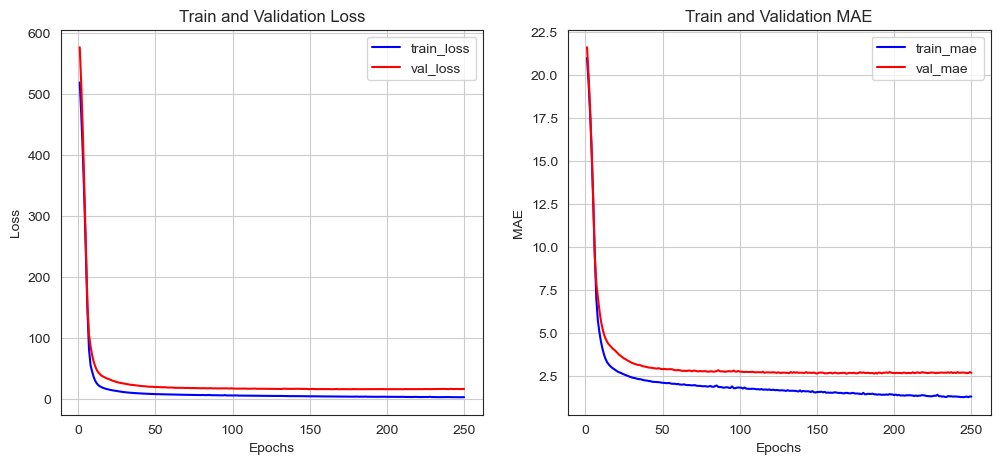

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
sns.set_style('white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

### **모델 평가 및 예측**
* 테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [8]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 21.7187 - mae: 2.9172


[21.7187442779541, 2.9172375202178955]

4/4 [==============================] - 0s 1ms/step


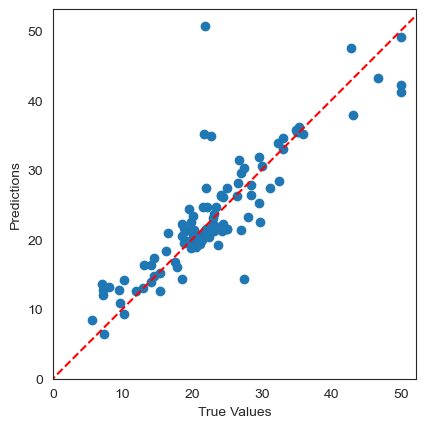

In [9]:
# 테스트 데이터셋의 예측 값 계산
test_predictions = model.predict(test_data).flatten()

# 산점도 그리기
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal') 
plt.axis('square') # x축과 y축의 범위를 동일하게 설정하여 정사각형 모양으로 출력
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100], 'r--') # 반환값을 무시하기 위해 '_' 변수에 할당

plt.show()

## **2. Reuters 딥러닝 모델**

### **데이터 로드 및 전처리**
* reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라미터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
* 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
* 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [10]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                                                                  test_size=0.25,
                                                                  random_state=33)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


* 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.
* 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [11]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000): 
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [12]:
# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### **모델 구성 및 컴파일**
* BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [13]:
# 모델 초기화 
K.clear_session()

In [14]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, )))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

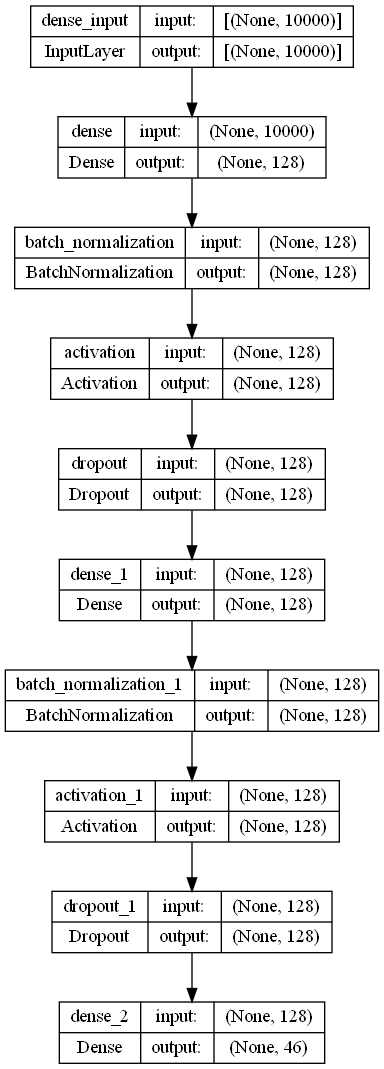

In [15]:
utils.plot_model(model, show_shapes=True)

### **모델 학습**
* ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다

In [16]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = ModelCheckpoint('reuters_best_model.h5',
                                save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10,
                                  monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=25,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/50
270/270 [==============================] - 4s 12ms/step - loss: 1.9262 - accuracy: 0.5557 - val_loss: 1.3484 - val_accuracy: 0.7208
Epoch 2/50
270/270 [==============================] - 3s 12ms/step - loss: 1.2649 - accuracy: 0.7015 - val_loss: 1.0374 - val_accuracy: 0.7787
Epoch 3/50
270/270 [==============================] - 3s 11ms/step - loss: 0.9934 - accuracy: 0.7644 - val_loss: 0.9907 - val_accuracy: 0.7841
Epoch 4/50
270/270 [==============================] - 3s 12ms/step - loss: 0.8333 - accuracy: 0.7929 - val_loss: 0.9061 - val_accuracy: 0.8081
Epoch 5/50
270/270 [==============================] - 3s 11ms/step - loss: 0.7075 - accuracy: 0.8223 - val_loss: 0.8918 - val_accuracy: 0.8152
Epoch 6/50
270/270 [==============================] - 3s 10ms/step - loss: 0.6191 - accuracy: 0.8461 - val_loss: 0.8677 - val_accuracy: 0.8148
Epoch 7/50
270/270 [==============================] - 3s 10ms/step - loss: 0.5482 - accuracy: 0.8588 - val_loss: 0.8752 - val_accuracy: 0.8175

* 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

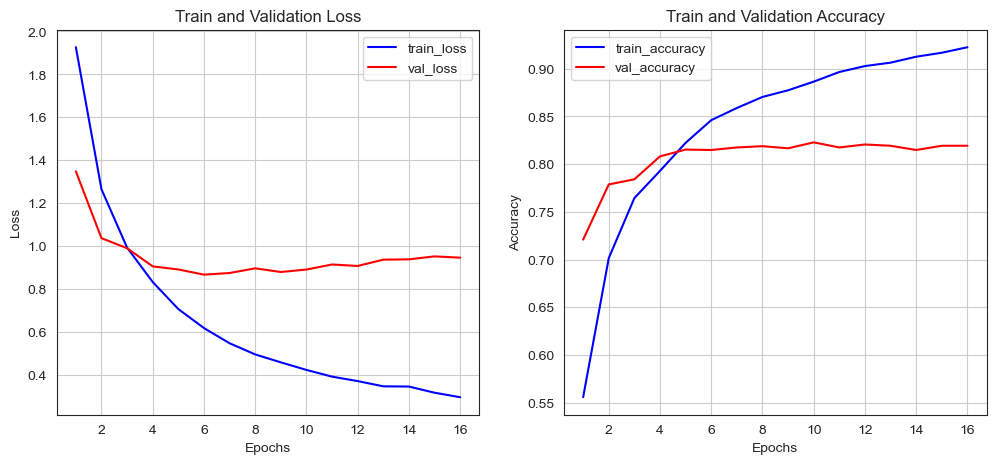

In [17]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
sns.set_style('white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### **모델 평가 및 예측**
* 테스트 데이터셋을 이용해 모델을 평가합니다.

In [18]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9757 - accuracy: 0.7903


[0.975731372833252, 0.7902938723564148]

## **3. CIFAR10 딥러닝 모델**

### **데이터 로드 및 전처리**
* CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
* 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
* 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [19]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
from tensorflow.keras.datasets import cifar10

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=33)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


* class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [20]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

* 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

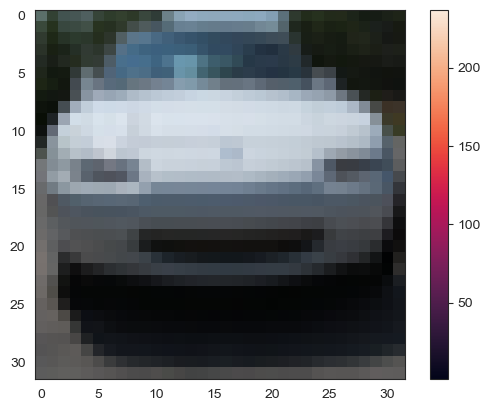

In [21]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
sns.set_style('white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [22]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


* 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [23]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3) # -1은 해당 차원의 크기를 자동으로 계산하는데 사용되는 placeholder
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [24]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

### **모델 구성 및 컴파일**
* BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [25]:
# 모델 초기화 
K.clear_session()

In [26]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(2048, input_shape=(32 * 32 * 3, )))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                        

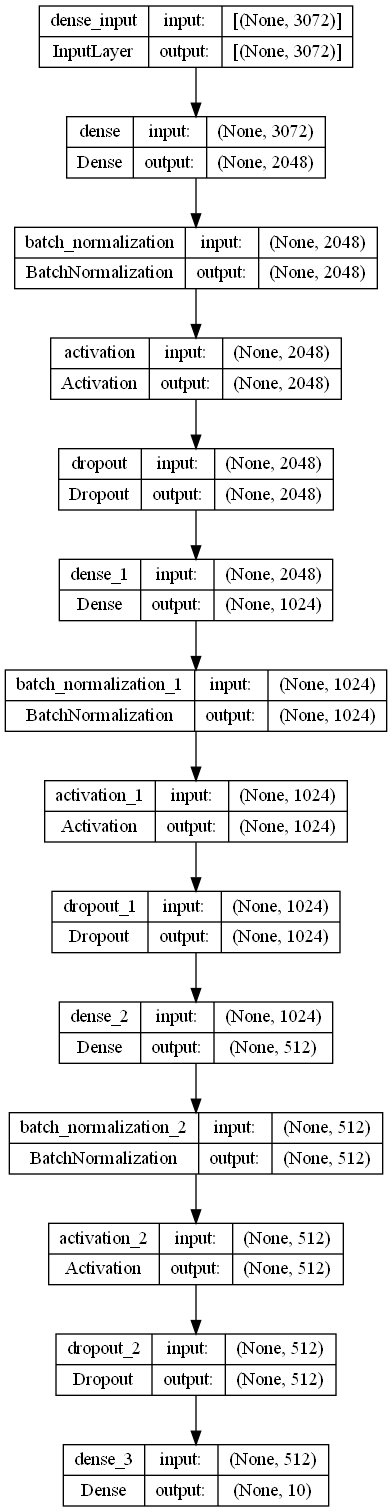

In [27]:
utils.plot_model(model, show_shapes=True)

### **모델 학습**
* ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [28]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = ModelCheckpoint('cifar10_best_model.h5',
                                save_best_only=True)
early_stopping_cb = EarlyStopping(patience=6,
                                  monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/50
625/625 [==============================] - 51s 80ms/step - loss: 1.9576 - accuracy: 0.3220 - val_loss: 1.7259 - val_accuracy: 0.3767
Epoch 2/50
625/625 [==============================] - 49s 78ms/step - loss: 1.6554 - accuracy: 0.4096 - val_loss: 1.6656 - val_accuracy: 0.4043
Epoch 3/50
625/625 [==============================] - 49s 78ms/step - loss: 1.5562 - accuracy: 0.4441 - val_loss: 1.7303 - val_accuracy: 0.3748
Epoch 4/50
625/625 [==============================] - 49s 79ms/step - loss: 1.5006 - accuracy: 0.4656 - val_loss: 1.6764 - val_accuracy: 0.3981
Epoch 5/50
625/625 [==============================] - 48s 78ms/step - loss: 1.4606 - accuracy: 0.4769 - val_loss: 1.6005 - val_accuracy: 0.4169
Epoch 6/50
625/625 [==============================] - 48s 78ms/step - loss: 1.4221 - accuracy: 0.4943 - val_loss: 1.6588 - val_accuracy: 0.4022
Epoch 7/50
625/625 [==============================] - 48s 77ms/step - loss: 1.3825 - accuracy: 0.5063 - val_loss: 1.6495 - val_accuracy:

* 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

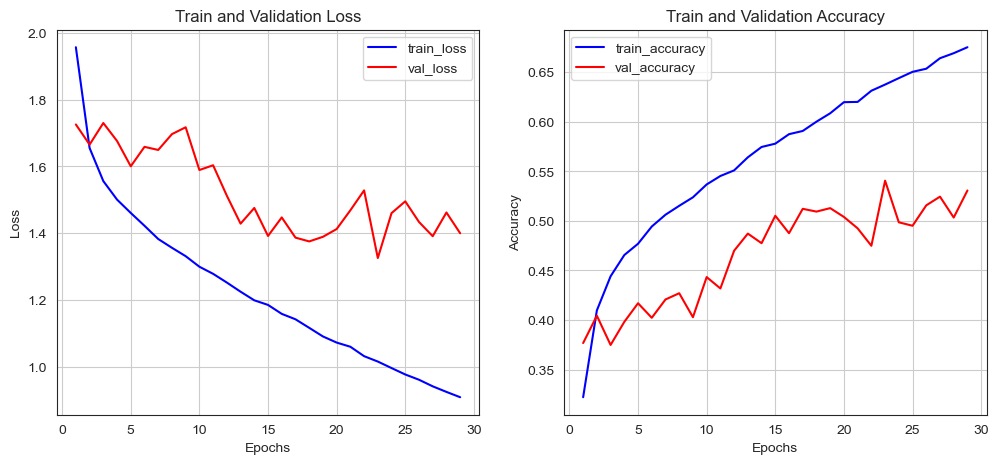

In [29]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
sns.set_style('white') 

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### **모델 평가 및 예측**
* 테스트 데이터셋을 이용해 모델을 평가합니다.

In [30]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.3246 - accuracy: 0.5327


[1.3245762586593628, 0.5327000021934509]

In [31]:
pred_ys = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [32]:
# classification report
y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.57      0.65      0.61      1000
  automobile       0.71      0.60      0.65      1000
        bird       0.53      0.30      0.38      1000
         cat       0.35      0.43      0.38      1000
        deer       0.39      0.57      0.46      1000
         dog       0.40      0.48      0.43      1000
        frog       0.68      0.46      0.55      1000
       horse       0.64      0.57      0.61      1000
        ship       0.73      0.63      0.68      1000
       truck       0.57      0.65      0.60      1000

    accuracy                           0.53     10000
   macro avg       0.56      0.53      0.54     10000
weighted avg       0.56      0.53      0.54     10000



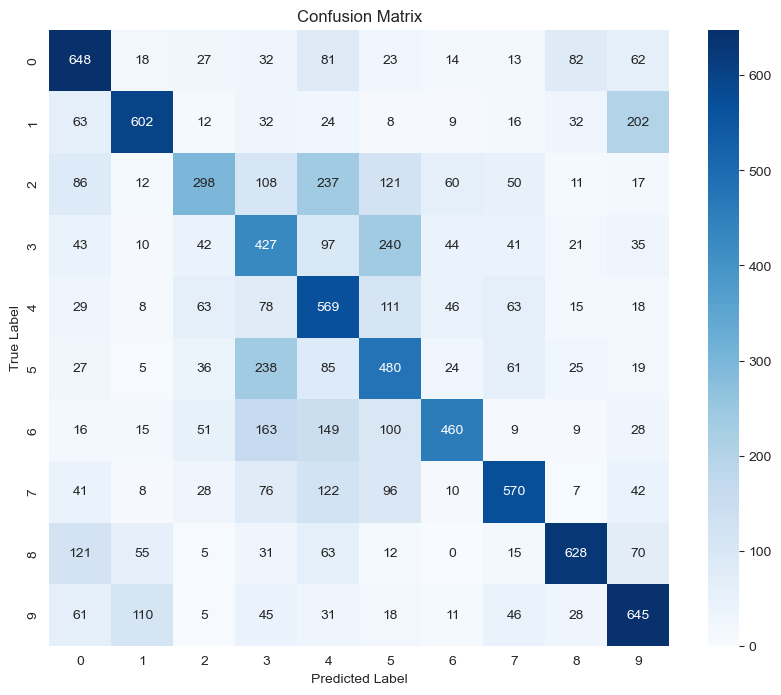

In [33]:
# confusion matrix 시각화
plt.figure(figsize=(10, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

---

### **프로젝트 회고**

딥러닝 첫번째 프로젝트인 만큼 직접 코드를 작성해야 되는 부분이 그렇게 많지 않아서 프로젝트 자체는 큰 어려움 없이 마무리 할 수 있었던 것 같다. 하지만 첫번째와 두번째 프로젝트는 영상에서 나온 그래프와 비교적 비슷한 형상을 보였던 것 같은데 마지막 세번째는 영상에서의 그래프와 같은 모습을 나타내지 못 해 매우 아쉬웠다. 왜 이렇게 성능이 안 좋게 나오는지 고민해봤는데 아마도 이미지 데이터 셋이라 CNN 모델이 이를 분류하는데 적합하지 않았을까 싶다. 그리고 최종적으로는 세가지 프로젝트 모두 optimizer로 adam을 사용했을 때 가장 좋은 성능을 보였고, 에폭 수를 늘리고 배치 사이즈를 줄일 수록 점수가 좋아졌던 것 같다. 마지막 프로젝트의 경우 학습시키는데 너무 오래 걸려서 인내심의 한계를 느끼기도 했다... ^^ (GPU 사용해보려고 시도해봤지만 실패)

#### **새로 알게 된 것!**
**딥러닝 모델 성능을 향상시키기 위해 무엇을 할 수 있을까?**
1. 더 많은 데이터 수집
2. 데이터 전처리
3. 더 깊은 모델 아키텍처
4. 하이퍼파라미터 조정 (모델의 학습 속도, 배치 크기, 에폭 수 등)
5. 정규화 기술 (드롭아웃, 배치 정규화 등)
6. 전이 학습 (미리 학습된 모델을 사용하여 새로운 작업을 수행하는 기술)

**참고한 레퍼런스**
<br>한땀한땀 딥러닝 컴퓨터 비전 백과사전  https://wikidocs.net/152765
<br>딥러닝 모델 성능 개선하는 법 (캐글 Tip!) https://facerain.club/improve-dl-performance/
<br>보스턴 주택 가격 예측 https://velog.io/@lydiap/%EB%B3%B4%EC%8A%A4%ED%84%B4-%EC%A3%BC%ED%83%9D-%EA%B0%80%EA%B2%A9-%EC%98%88%EC%B8%A1
<br>[딥러닝] 배치 사이즈(batch size) vs 에포크(epoch) vs 반복(iteration)의 차이 https://losskatsu.github.io/machine-learning/epoch-batch/#2-batch-size%EC%9D%98-%EC%9D%98%EB%AF%B8